### Q1. Explain the basic concept of clustering and give examples of applications where clustering is useful.
### Ans:
**Basic Concept of Clustering**:
- **Definition**: Clustering is an unsupervised learning technique used to group similar data points into clusters or groups. The goal is to ensure that data points within a cluster are more similar to each other than to those in other clusters.
- **Objective**: To identify underlying structures or patterns in the data without pre-existing labels.

**Applications**:
- **Customer Segmentation**: Identifying distinct customer groups based on purchasing behavior for targeted marketing.
- **Image Segmentation**: Grouping pixels with similar colors to detect objects in images.
- **Anomaly Detection**: Identifying unusual patterns or outliers in fraud detection.
- **Document Clustering**: Grouping similar documents for topic modeling or information retrieval.

### Q2. What is DBSCAN and how does it differ from other clustering algorithms such as k-means and hierarchical clustering?
### Ans:
**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:
- **Definition**: DBSCAN is a density-based clustering algorithm that groups together data points that are closely packed together and marks points in low-density regions as outliers.
- **Key Parameters**: 
  - **Epsilon (ε)**: The maximum distance between two points to be considered in the same neighborhood.
  - **MinPts**: The minimum number of points required to form a dense region (a cluster).

**Differences**:
- **k-means**: 
  - **Method**: Partitions data into k clusters by minimizing the variance within each cluster.
  - **Assumptions**: Assumes spherical clusters and requires specifying the number of clusters in advance.
  - **Limitations**: Sensitive to the initial placement of centroids and may not handle non-spherical clusters well.
  
- **Hierarchical Clustering**:
  - **Method**: Builds a hierarchy of clusters using either agglomerative (bottom-up) or divisive (top-down) approaches.
  - **Output**: Produces a dendrogram, which represents nested clusters.
  - **Limitations**: Computationally expensive for large datasets.

- **DBSCAN**: 
  - **Method**: Groups points based on density, can identify clusters of arbitrary shape, and does not require specifying the number of clusters.
  - **Strengths**: Handles noise and outliers well, and can find clusters with varying shapes and sizes.

### Q3. How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN clustering?
### Ans:
**Determining Optimal Parameters**:
- **Epsilon (ε)**:
  - **K-distance Graph**: Plot the distance to the k-th nearest neighbor (where k = MinPts) for each point. The point where the plot shows a significant bend or elbow can be chosen as the ε value.
  
- **MinPts**:
  - **Rule of Thumb**: A common heuristic is to set MinPts to at least the dimensionality of the dataset plus one (e.g., MinPts = Dimensionality + 1).
  - **Domain Knowledge**: If available, domain-specific knowledge about the expected cluster sizes can guide the choice.

### Q4. How does DBSCAN clustering handle outliers in a dataset?
### Ans:
**Handling Outliers**:
- **Definition**: In DBSCAN, outliers are defined as points that do not belong to any cluster. These are points that are not within the ε radius of any other point and are not part of a dense region with at least MinPts.
- **Result**: Such points are labeled as noise and are not assigned to any cluster.

### Q5. How does DBSCAN clustering differ from k-means clustering?
### Ans:
**Differences**:
- **Cluster Shape**: DBSCAN can find clusters of arbitrary shapes, while k-means tends to find spherical clusters.
- **Parameters**:
  - **k-means**: Requires specifying the number of clusters (k) in advance.
  - **DBSCAN**: Requires ε and MinPts, but not the number of clusters.
- **Handling Noise**: DBSCAN can identify and handle noise or outliers, while k-means does not explicitly account for outliers.

### Q6. Can DBSCAN clustering be applied to datasets with high dimensional feature spaces? If so, what are some potential challenges?
### Ans:
**Application to High-Dimensional Data**:
- **Yes, DBSCAN can be applied** to high-dimensional datasets. However, there are challenges:
  - **Curse of Dimensionality**: Distance metrics become less meaningful as the number of dimensions increases, making it difficult to define ε and MinPts appropriately.
  - **Computational Complexity**: DBSCAN’s time complexity increases with the number of dimensions and data points, which can make it computationally expensive.

### Q7. How does DBSCAN clustering handle clusters with varying densities?
### Ans:
**Handling Varying Densities**:
- **Challenge**: DBSCAN may struggle with clusters of varying densities, as it relies on a fixed ε and MinPts. Dense clusters might merge with less dense clusters or be missed entirely.
- **Solution**: To handle varying densities, consider alternative algorithms or variations of DBSCAN like HDBSCAN (Hierarchical DBSCAN), which can better handle clusters with varying densities.

### Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?
### Ans:
**Evaluation Metrics**:
- **Silhouette Score**: Measures how similar a point is to its own cluster compared to other clusters.
- **Davies-Bouldin Index**: Measures the average similarity ratio of each cluster with its most similar cluster.
- **Adjusted Rand Index (ARI)**: Compares the clustering results with ground truth labels, if available.
- **Visual Inspection**: For visualizable clusters, inspecting the clustering results visually can provide insights.

### Q9. Can DBSCAN clustering be used for semi-supervised learning tasks?
### Ans:
**Semi-Supervised Learning**:
- **Yes, DBSCAN can be used** for semi-supervised learning. In such cases, labeled data can be used to guide the clustering process or evaluate the clusters. However, DBSCAN itself does not directly incorporate labeled data in its clustering process.

### Q10. How does DBSCAN clustering handle datasets with noise or missing values?
### Ans:
**Handling Noise**:
- **Noise**: DBSCAN identifies noise as points not belonging to any cluster and labels them as such.
- **Missing Values**: DBSCAN does not handle missing values directly. Missing values should be imputed or handled before applying DBSCAN.

### Q11. Implement the DBSCAN algorithm using a Python programming language, and apply it to a sample dataset. Discuss the clustering results and interpret the meaning of the obtained clusters.

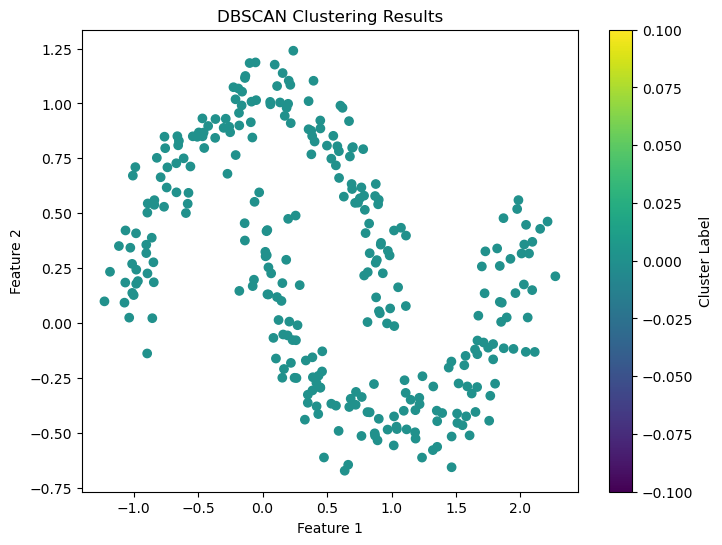

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate a sample dataset
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

**Discussion**:
- **Clusters**: The output plot shows clusters identified by DBSCAN, with each cluster in a different color. Points labeled as -1 represent noise.
- **Interpretation**: Clusters represent groups of closely packed data points. Noise points are those not fitting into any cluster based on the ε and MinPts parameters.
